# Complete Natural Language Processing (NLP) Tutorial in Python! (with examples)


In [1]:
import numpy as np

class Category:
    BOOKS = "BOOKS"
    CLOTHING = "CLOTHING"
    EMOTIONS = "EMOTIONs"

train_x = ["I love the book" , "this is a great book" , "the fit is great" , "I love the shoes" , "your novel is very emotional"]

train_y = [Category.BOOKS , Category.BOOKS , Category.CLOTHING,Category.CLOTHING , Category.EMOTIONS]


In [2]:
from sklearn.feature_extraction.text import CountVectorizer 

# unigram and biogram approaches
vectorizer = CountVectorizer(binary = True , ngram_range = (1,1))
train_x_vectors = vectorizer.fit_transform(train_x)

print(vectorizer.get_feature_names_out())
# based on feature names vectors array are made
print(train_x_vectors.toarray())

['book' 'emotional' 'fit' 'great' 'is' 'love' 'novel' 'shoes' 'the' 'this'
 'very' 'your']
[[1 0 0 0 0 1 0 0 1 0 0 0]
 [1 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 1 1 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 1 1]]


In [3]:
# now we wanna biuld a classifier

from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors , train_y)

SVC(kernel='linear')

In [4]:
test_x = vectorizer.transform(["My story is about emotion"])

clf_svm.predict(test_x)

array(['CLOTHING'], dtype='<U8')

# word vectors ( we shall use spaCy library) is related to word embedding
# SpaCy library is about word vectors and semantic similarity
Capture a smantic meaning of a word in a vector


In [16]:
# !python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [22]:
import spacy

nlp = spacy.load("en_core_web_md")

In [23]:
docs = [nlp(text) for text in train_x]
print(docs)
# get feature names
train_x_word_vectors = [x.vector for x in docs]
print(train_x_word_vectors[0].shape)

[I love the book, this is a great book, the fit is great, I love the shoes, your novel is very emotional]
(300,)


In [24]:
type(train_x_word_vectors)

list

In [6]:
# define classifier again
from sklearn import svm

clf_svm_wv = svm.SVC(kernel='linear')
clf_svm_wv.fit(train_x_word_vectors, train_y)

SVC(kernel='linear')

In [9]:
test_text = ["I love my jacket"]
test_docs = [nlp(text) for text in test_text]
print(test_docs)
# test_docs should be converted to vector
test_x_word_vectors = [x.vector for x in test_docs]


clf_svm_wv.predict(test_x_word_vectors)

[I love my jacket]


array(['CLOTHING'], dtype='<U8')

# Regexes (is very important in nlp)

pattern matching of string in python

ex: passwoed checkers, phone number, emails, and more!

In [5]:
import re

regexp_1 = re.compile(r"^ab[^\s]*cd$")



matches =[]
phrases = ["abcd" , "xxx" , "abxxxxcd" ,"ab cd"]

for phrase in phrases:
#     re.search
    if re.match(regexp , phrase):
        matches.append(phrase)
    
print(matches)   

['abcd', 'abxxxxcd']


In [19]:
# another example of regexes

regexp_2 = re.compile(r"\b read\b|\bstory\b|book")
matches =[]

phrases = ["I liked that stroy" , "I like that book" , "this hat is nice"]

for phrase in phrases:
    if re.search(regexp_2 , phrase):
        matches.append(phrase)
        
print(matches)   

['I like that book']


# stemming , lemmatization
techniques to normalize text

a drawback of stemming is that sometimes the output is not canonical (ex: stories ---> stori)



In [6]:
import nltk

# nltk.download("wordnet")
# nltk.download("stopwords")
# nltk.download("punkt")

In [9]:
from nltk.tokenize import word_tokenize
# stemmer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

phrase = "reading the stories of the books."
words = word_tokenize(phrase)


stemmed_words=[]
for word in words:
    stemmed_words.append(stemmer.stem(word))
    

print(stemmer.stem(phrase))
print(words)
# good technique join feature of list
print("   ".join(stemmed_words))

reading the stories of the books.
['reading', 'the', 'stories', 'of', 'the', 'books', '.']
read   the   stori   of   the   book   .


In [51]:
# now we are going to lemmatization
from nltk.stem import WordNetLemmatizer

Lemmatizer = WordNetLemmatizer()

phrase = "reading the stories of the better books."
words = word_tokenize(phrase)


lemmatized_words=[]
for word in words:
    lemmatized_words.append(Lemmatizer.lemmatize(word , pos ="a"))
    
    
    
print(Lemmatizer.lemmatize(phrase))
print(" ".join(lemmatized_words))

reading the stories of the better books.
reading the stories of the good books .


# Stopwords removal


In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

phrase = "here is an example sentence demonstrating the removal of stopwords"

words = word_tokenize(phrase)

stripped_phrase =[]
for word in words:
    if word not in  stop_words:
        stripped_phrase.append(word)
print(" ".join(stripped_phrase))
# print(stop_words)


example sentence demonstrating removal stopwords


In [ ]:
s = np.array(stop_words)
np.where(s=='here')

# various other techniques 
(spell correction, sentiment & Pos tagging)

* Look at API references for textblob

In [1]:
from textblob import TextBlob
# nltk.download('averaged_perceptron_tagger')
Phrase= TextBlob("I and yo konow that Sometimes revolution is not bad for peple ")

print(Phrase.correct())
print(Phrase.tags)
print(Phrase.sentiment)

I and to know that Sometimes revolution is not bad for people 
[('I', 'PRP'), ('and', 'CC'), ('yo', 'VB'), ('konow', 'NN'), ('that', 'IN'), ('Sometimes', 'NNP'), ('revolution', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('bad', 'JJ'), ('for', 'IN'), ('peple', 'NN')]
Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)


In [5]:
from spellchecker import SpellChecker

Phrase= TextBlob("I and yo konow that Sometimes revolution is not bad for peple ")

spell = SpellChecker()

corrected_words = [spell.correction(word) for word in Phrase.split()]

corrected_phrase = " ".join(corrected_words)

print(corrected_phrase)

I and yo know that Sometimes revolution is not bad for people


# at the end, machine learing models ...

# Recurrent neural network

#Drawbacks
* longer dependencies don't have always perform well
* sequntial nature of RNNs make it tough to parallize and effectively use modern GPUs

These drawbacks lead us to attention and attention is all we need ... and the highl-level network 
learns to ask question about phrases it sees, to learn how tokens relate.


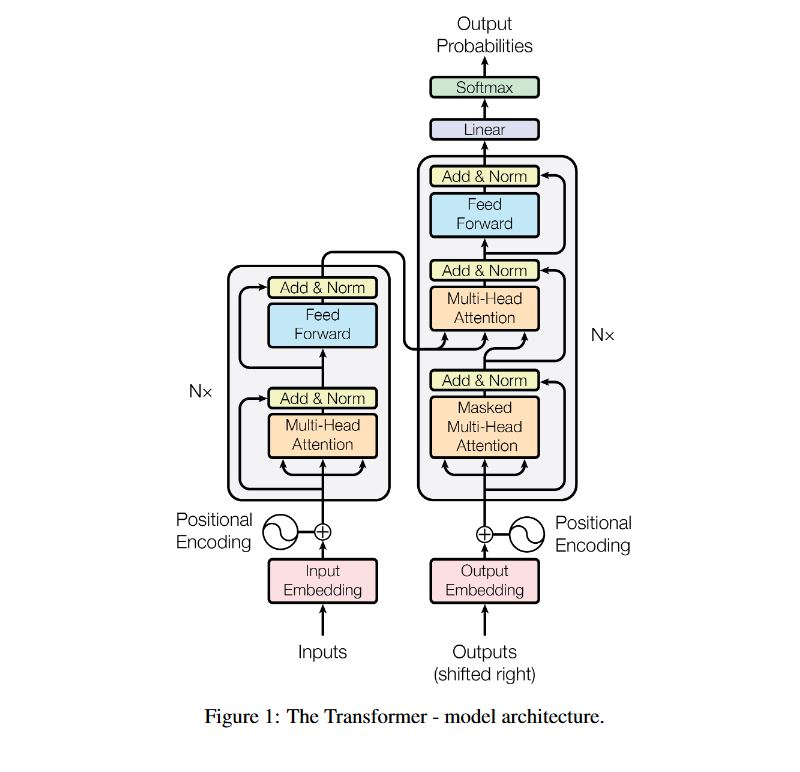

# Tansformer Architecture
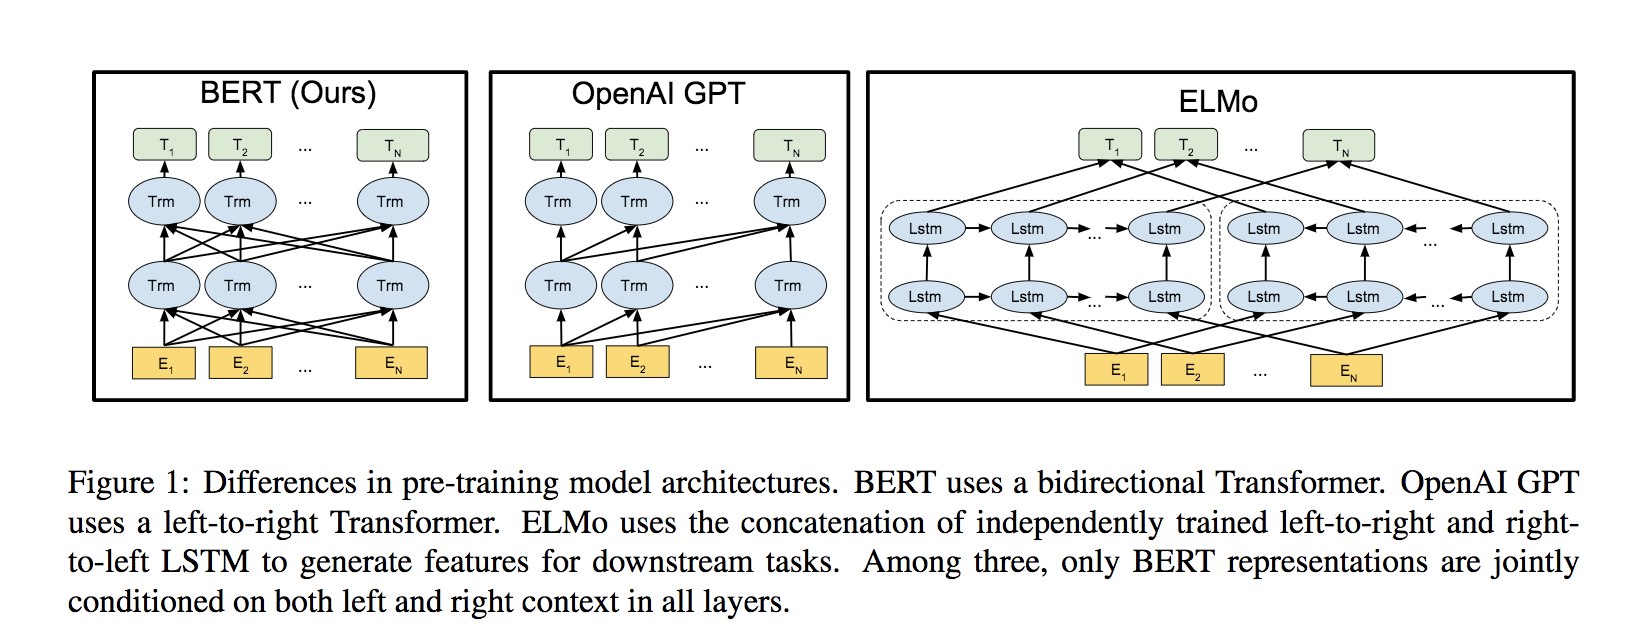

** So we are going to use spacy again (spacy meets transformers : https://explosion.ai/blog/spacy-transformers) because spacy provides us to use transformers interactively...

# so now we are going to see the power of transformers like,Bert ,...

In [13]:
import spacy
import torch
import numpy as np
from numpy.testing import assert_almost_equal
# if you wanna use GPU
is_using_gpu = spacy.prefer_gpu()
if is_using_gpu:
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

nlp_TR = spacy.load("en_core_web_trf")

# doc = nlp_TR("Here is some text to encode.")

ModuleNotFoundError: No module named 'en_pytt_bertbaseuncased_lg'

In [7]:
from sklearn import svm

class Category:
    BOOKS = "BOOKS"
    CLOTHING = "CLOTHING"
    EMOTIONS = "EMOTIONs"

train_x = ["I love the book" , "this is a great book" , "the fit is great" , "I love the shoes" , "your novel is very emotional"]

train_y = [Category.BOOKS , Category.BOOKS , Category.CLOTHING, Category.CLOTHING , Category.EMOTIONS]




docs = [nlp_TR(text) for text in train_x]
train_x_vectors = [doc._.trf_data.tensors[-1] for doc in docs]
train_x_vectors = np.array(train_x_vectors)
train_x_vectors = train_x_vectors.reshape(len(train_x), -1)

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)



SVC(kernel='linear')

In [9]:
test_x = ["this story is emotional"]
docs = [nlp_TR(text) for text in test_x]
test_x_vectors = [doc._.trf_data.tensors[-1][0] for doc in docs]
test_x_vectors = np.array(test_x_vectors)
test_x_vectors = test_x_vectors.reshape(len(test_x), -1)
clf_svm.predict(test_x_vectors)

array(['CLOTHING'], dtype='<U8')

In [4]:
spacy.load("en_trf_bertbaseuncased_lg")

OSError: [E050] Can't find model 'en_trf_bertbaseuncased_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [51]:
from transformers import GPT2Config, GPT2Model , pipeline

In [52]:
fix_spelling = pipeline("text2text-generation",model="oliverguhr/spelling-correction-english-base")

print(fix_spelling("lets do a comparsion",max_length=2048))


C:\Anaconda3\envs\pytorch\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alireza\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


[{'generated_text': "Let's do a comparison."}]


In [53]:
print(fix_spelling("I and yo konow that Sometimes revolution is not bad for peple",max_length=2048))

[{'generated_text': 'I and you know that sometimes revolution is not bad for people.'}]


In [10]:
spacy.__version__

'3.5.1'